In [180]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h3>Seting device, random seed, and runtime parameter</h3>

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

torch.manual_seed(901)
np.random.seed(901)
if device.type == 'cuda':
    torch.cuda.manual_seed_all(901)

False


In [433]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


<h3>a. (i) 10 x 5 Gird</h3>

In [435]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 100, shuffle = True, num_workers = 2)

In [436]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

def picture_grid(images, labels, classes):
    fig, axs = plt.subplots(10, 5, figsize = (5, 10),gridspec_kw={'wspace': 0.1, 'hspace': 0.1})
    for i in range(10):
        indices = np.where(labels == i)[0][:5]
        for j in range(5):
            if j < len(indices):
                img = images[indices[j]]
                img = img /2 + 0.5
                img = np.transpose(img.numpy(), (1, 2, 0))
                axs[i,j].imshow(img)
                axs[i,j].axis('off')
            else:
                axs[i,j].axis('off')
        axs[i, 0].axis('on')
        axs[i, 0].text(-0.5, 0.5, classes[i], fontsize=12, 
                       rotation=0, va='center', ha='right', transform=axs[i, 0].transAxes)
        axs[i, 0].axis('off')
    plt.show()

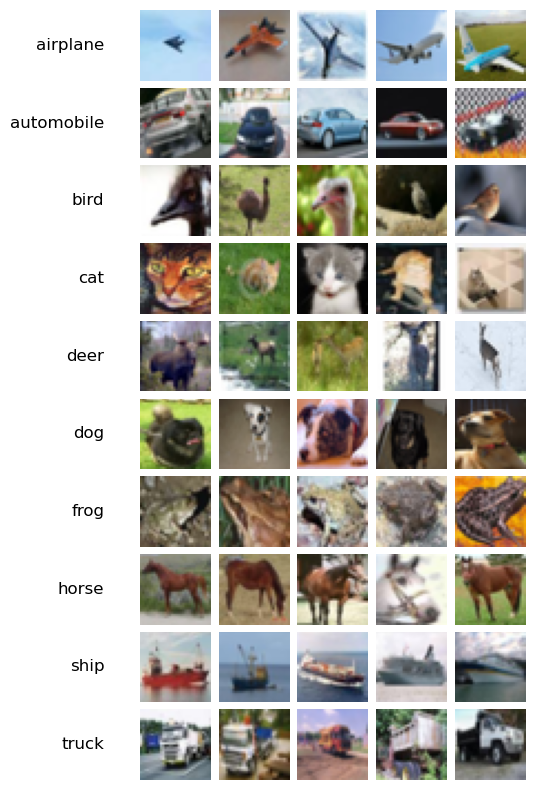

In [437]:
# get some random training images
dataiter = iter(trainloader)
figures, class_label = next(dataiter)
picture_grid(figures, class_label, classes)

<h3>a.(ii)  Normalize</h3>

In [30]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
train_data = torch.tensor(trainset.data / 255.0)
mean = train_data.mean(dim=(0, 1, 2))
std = train_data.std(dim=(0, 1, 2))
print(mean, std)

transform_a_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean.tolist(), std=std.tolist())
])

trainset_a_ii = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform= transform_a_ii)
testset_a_ii = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform= transform_a_ii)


Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465], dtype=torch.float64) tensor([0.2470, 0.2435, 0.2616], dtype=torch.float64)
Files already downloaded and verified
Files already downloaded and verified


<h3>a.(iii) Partition Training Dataset</h3>

In [10]:
from torch.utils.data import random_split

In [32]:
training_set_size = int(len(trainset_a_ii) * 0.8)
print(training_set_size)

40000


In [33]:
validation_set_size = int(len(trainset_a_ii) * 0.2)
print(validation_set_size)

10000


In [38]:
training_set_a_iii, validation_set_a_iii = random_split(trainset_a_ii, [training_set_size, validation_set_size])

In [447]:
#trainloader_a_iii = torch.utils.data.DataLoader(training_set_a_iii, batch_size = 100, shuffle = True, num_workers = 2)
#validation_loader_a_iii = torch.utils.data.DataLoader(validation_set_a_iii, batch_size = 100, shuffle = True, num_workers = 2)

<h3>b.(i) </h3>

In [449]:
torch.manual_seed(901)
np.random.seed(901)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [451]:
class Convo_Neural_Model(nn.Module):
    def __init__(self):
        super(Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()

        # connected "dense" layer1
        self.connect1 = nn.Linear(32 * 8 * 8, 512)
        self.relu3 = nn.ReLU()
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.connect1(x))
        x = self.connect2(x)
        x = self.softmax(x)
        return x

<h3>b.(ii)</h3>

In [40]:
# somewhere can be changed
transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=64, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=64, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified
40000


<h3>b.(iii)</h3>

In [14]:
import torch.nn as nn
import torch.optim as optim

In [456]:
model_b = Convo_Neural_Model()

criterion_b = nn.CrossEntropyLoss()
optimizer_b = optim.Adam(model_b.parameters())

early_stop_tolerance_b =5
best_val_loss_b = float('inf')
epochs_no_improve_b = 0

train_loss_b = []
train_accuracy_b = []

val_loss_b = []
val_accuracy_b = []

epoch_times = 100

In [457]:
for e in range(epoch_times):
    model_b.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in trainloader_b_ii:
        optimizer_b.zero_grad()
        outputs = model_b(inputs)

        loss = criterion_b(outputs, labels)

        loss.backward()
        optimizer_b.step()

        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_b.append(train_loss / len(trainloader_b_ii))
    train_accuracy_b.append(100 * correct_train / total_train)

    # validation
    model_b.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_b(inputs)
            loss = criterion_b(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_b.append(val_loss / len(valloader_b_ii))
    val_accuracy_b.append(100 * correct_val / total_val)

    # early stop
    if val_loss < best_val_loss_b:
        best_val_loss_b = val_loss
        epochs_no_improve_b = 0
        best_model = model_b.state_dict()  # save best model
    else:
        epochs_no_improve_b = epochs_no_improve_b + 1
        if epochs_no_improve_b >= early_stop_tolerance_b:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.1576, train accuracy: 29.18%, val Loss: 2.0846, val accuracy: 36.95%
epoch 2/100, train loss: 2.0684, train accuracy: 38.50%, val Loss: 2.0482, val accuracy: 40.59%
epoch 3/100, train loss: 2.0312, train accuracy: 42.34%, val Loss: 2.0102, val accuracy: 44.26%
epoch 4/100, train loss: 2.0028, train accuracy: 45.23%, val Loss: 2.0016, val accuracy: 45.18%
epoch 5/100, train loss: 1.9822, train accuracy: 47.41%, val Loss: 1.9691, val accuracy: 48.66%
epoch 6/100, train loss: 1.9673, train accuracy: 48.91%, val Loss: 1.9595, val accuracy: 49.66%
epoch 7/100, train loss: 1.9522, train accuracy: 50.41%, val Loss: 1.9553, val accuracy: 50.03%
epoch 8/100, train loss: 1.9429, train accuracy: 51.39%, val Loss: 1.9517, val accuracy: 50.59%
epoch 9/100, train loss: 1.9329, train accuracy: 52.50%, val Loss: 1.9257, val accuracy: 53.05%
epoch 10/100, train loss: 1.9278, train accuracy: 52.95%, val Loss: 1.9310, val accuracy: 52.56%
epoch 11/100, train loss: 1.9190, train

In [458]:
# load best model
model_b.load_state_dict(best_model)

<All keys matched successfully>

In [459]:
# test
model_b.eval()
total_test_b = 0
correct_test_b = 0
with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_b(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_b = total_test_b + labels.size(0)
        correct_test_b = correct_test_b + (predicted == labels).sum().item()

test_accuracy_b = 100 * correct_test_b / total_test_b
print(f"Test Accuracy: {test_accuracy_b:.2f}%")

Test Accuracy: 65.11%


<h3>Best Model Precision</h3>

In [461]:
print(f"Test Accuracy: {test_accuracy_b:.2f}%")

Test Accuracy: 65.11%


<h3>b. (iv)</h3>

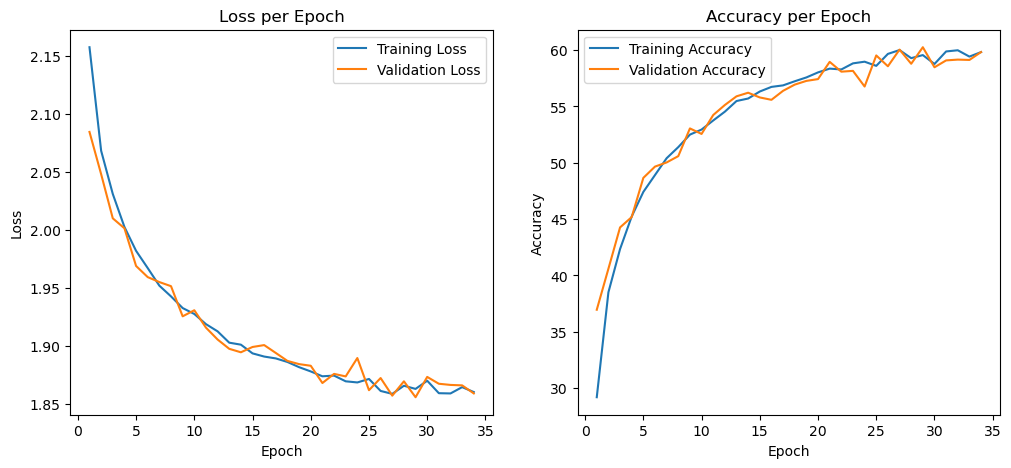

In [463]:
epochs = range(1, len(train_loss_b) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_b, label='Training Loss')
plt.plot(epochs, val_loss_b, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_b, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_b, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


<h2> c. Increasing Model Depth </h2>

In [465]:
torch.manual_seed(901)
np.random.seed(901)

In [466]:
class Deep_Convo_Neural_Model(nn.Module):
    def __init__(self):
        super(Deep_Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()

        # connected "dense" layer1
        self.connect1 = nn.Linear(64 * 2 * 2, 512)
        self.relu5 = nn.ReLU()
        
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu5(self.connect1(x))
        x = self.connect2(x)
        x = self.softmax(x)
        return x

In [467]:
# somewhere can be changed
transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=64, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=64, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified
40000


In [468]:
model_c = Deep_Convo_Neural_Model()

criterion_c = nn.CrossEntropyLoss()
optimizer_c = optim.Adam(model_c.parameters())

early_stop_tolerance_c = 5
best_val_loss_c = float('inf')
epochs_no_improve_c = 0

train_loss_c = []
train_accuracy_c = []

val_loss_c = []
val_accuracy_c = []

epoch_times = 100

In [469]:
for e in range(epoch_times):
    model_c.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in trainloader_b_ii:
        optimizer_c.zero_grad()
        outputs = model_c(inputs)

        loss = criterion_c(outputs, labels)

        loss.backward()
        optimizer_c.step()

        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_c.append(train_loss / len(trainloader_b_ii))
    train_accuracy_c.append(100 * correct_train / total_train)
    
    # validation
    model_c.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_c(inputs)
            loss = criterion_c(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_c.append(val_loss / len(valloader_b_ii))
    val_accuracy_c.append(100 * correct_val / total_val)

    # early stop
    if val_loss < best_val_loss_c:
        best_val_loss_c = val_loss
        epochs_no_improve_c = 0
        best_model = model_c.state_dict()  # save best model
    else:
        epochs_no_improve_c = epochs_no_improve_c + 1
        if epochs_no_improve_c >= early_stop_tolerance_c:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.1873, train accuracy: 25.73%, val Loss: 2.1593, val accuracy: 29.10%
epoch 2/100, train loss: 2.1064, train accuracy: 34.60%, val Loss: 2.0762, val accuracy: 37.55%
epoch 3/100, train loss: 2.0722, train accuracy: 38.19%, val Loss: 2.0573, val accuracy: 39.38%
epoch 4/100, train loss: 2.0453, train accuracy: 41.02%, val Loss: 2.0375, val accuracy: 41.47%
epoch 5/100, train loss: 2.0263, train accuracy: 42.87%, val Loss: 2.0183, val accuracy: 43.62%
epoch 6/100, train loss: 2.0106, train accuracy: 44.51%, val Loss: 2.0057, val accuracy: 44.85%
epoch 7/100, train loss: 1.9957, train accuracy: 46.07%, val Loss: 1.9722, val accuracy: 48.35%
epoch 8/100, train loss: 1.9890, train accuracy: 46.78%, val Loss: 1.9938, val accuracy: 46.19%
epoch 9/100, train loss: 1.9747, train accuracy: 48.15%, val Loss: 1.9602, val accuracy: 49.62%
epoch 10/100, train loss: 1.9673, train accuracy: 48.88%, val Loss: 1.9547, val accuracy: 50.23%
epoch 11/100, train loss: 1.9549, train

In [470]:
# load best model
model_c.load_state_dict(best_model)

<All keys matched successfully>

In [471]:
# test
model_c.eval()
total_test_c = 0
correct_test_c = 0
with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_c(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_c = total_test_c + labels.size(0)
        correct_test_c = correct_test_c + (predicted == labels).sum().item()

test_accuracy_c = 100 * correct_test_c / total_test_c
print(f"test accuracy: {test_accuracy_c:.2f}%")

test accuracy: 56.19%


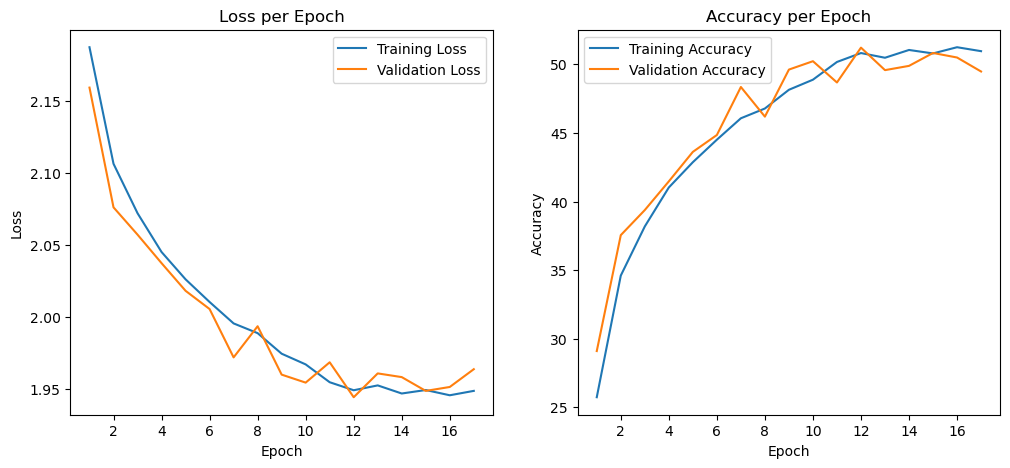

In [472]:
epochs = range(1, len(train_loss_c) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_c, label='Training Loss')
plt.plot(epochs, val_loss_c, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_c, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_c, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> compare two models b and c </h2>

By comparing the models in b and c, I found the test accuracy of model b (baseline model) is larger than the test accuracy of model c (deeper model).

For baseline model, training loss decreases steadily and the validation loss decreases in sync with the training loss, and slightly fluctuates when loss less than 1.95. The training accuracy increasing steadily and the validation accuracy increases in sync with the training accuracy, and slightly fluctuates when accuracy over 55%.

The model c has similar pattern as baseline model, the training loss steadily decreases and training accuracy steadily increasing, and the validation loss and accuracy have similar trends as training lines. However, the validation lines are more fluctuate than baseline model. Also, the model c may overfit.

This comparision illustrates that simply increasing model depth can lead to unstable training, the model need batch normalization and optimization, etc.

<h2> d. Batch Normalization</h2>

In [507]:
torch.manual_seed(901)
np.random.seed(901)

<h3> model from c add batch norm</h3>

In [509]:
class Batchnorm_Deep_Convo_Neural_Model(nn.Module):
    def __init__(self):
        super(Batchnorm_Deep_Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()

        # connected "dense" layer1
        self.connect1 = nn.Linear(64 * 2 * 2, 512)
        # add batch normalization layer
        self.batch_connect1 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        #print(x.size())
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        #print(x.size())
        x = self.pool3(self.relu3(self.batch_norm3(self.conv3(x))))
        #print(x.size())
        x = self.pool4(self.relu4(self.batch_norm4(self.conv4(x))))
        #print(x.size())
        x = self.flatten(x)
        #print(x.size())
        x = self.relu5(self.batch_connect1(self.connect1(x)))
        #print(x.size())
        x = self.connect2(x)
        #print(x.size())
        x = self.softmax(x)
        return x

In [511]:
# somewhere can be changed
transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=64, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=64, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified
40000


<h3> set parameters </h3>

In [512]:
model_d = Batchnorm_Deep_Convo_Neural_Model()

criterion_d = nn.CrossEntropyLoss()
optimizer_d = optim.Adam(model_d.parameters())

early_stop_tolerance_d = 5
best_val_loss_d = float('inf')
epochs_no_improve_d = 0

train_loss_d = []
train_accuracy_d = []

val_loss_d = []
val_accuracy_d = []

epoch_times = 100

<h3> train loss/accuracy and validation loss/accuracy </h3>

In [513]:
for e in range(epoch_times):
    model_d.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in trainloader_b_ii:
        optimizer_d.zero_grad()
        outputs = model_d(inputs)

        loss = criterion_d(outputs, labels)

        loss.backward()
        optimizer_d.step()

        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_d.append(train_loss / len(trainloader_b_ii))
    train_accuracy_d.append(100 * correct_train / total_train)
    
    # validation
    model_d.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_d(inputs)
            loss = criterion_d(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_d.append(val_loss / len(valloader_b_ii))
    val_accuracy_d.append(100 * correct_val / total_val)

    # early stop
    if val_loss < best_val_loss_d:
        best_val_loss_d = val_loss
        epochs_no_improve_d = 0
        best_model = model_d.state_dict()  # save best model
    else:
        epochs_no_improve_d = epochs_no_improve_d + 1
        if epochs_no_improve_d >= early_stop_tolerance_d:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0702, train accuracy: 38.51%, val Loss: 2.0035, val accuracy: 45.41%
epoch 2/100, train loss: 1.9820, train accuracy: 47.55%, val Loss: 1.9585, val accuracy: 50.04%
epoch 3/100, train loss: 1.9417, train accuracy: 51.53%, val Loss: 1.9171, val accuracy: 54.25%
epoch 4/100, train loss: 1.9151, train accuracy: 54.32%, val Loss: 1.9013, val accuracy: 55.66%
epoch 5/100, train loss: 1.8921, train accuracy: 56.62%, val Loss: 1.9027, val accuracy: 55.72%
epoch 6/100, train loss: 1.8777, train accuracy: 58.04%, val Loss: 1.8885, val accuracy: 56.70%
epoch 7/100, train loss: 1.8691, train accuracy: 58.97%, val Loss: 1.8669, val accuracy: 59.09%
epoch 8/100, train loss: 1.8607, train accuracy: 59.79%, val Loss: 1.8620, val accuracy: 59.54%
epoch 9/100, train loss: 1.8527, train accuracy: 60.55%, val Loss: 1.8481, val accuracy: 60.92%
epoch 10/100, train loss: 1.8427, train accuracy: 61.58%, val Loss: 1.8336, val accuracy: 62.61%
epoch 11/100, train loss: 1.8303, train

In [516]:
# load best model
model_d.load_state_dict(best_model)

<All keys matched successfully>

<h3> test accuracy </h3>

In [517]:
# test
model_d.eval()
total_test_d = 0
correct_test_d = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_d(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_d = total_test_d + labels.size(0)
        correct_test_d = correct_test_d + (predicted == labels).sum().item()

test_accuracy_d = 100 * correct_test_d / total_test_d
print(f"test accuracy: {test_accuracy_d:.2f}%")

test accuracy: 76.54%


<h3> plots </h3>

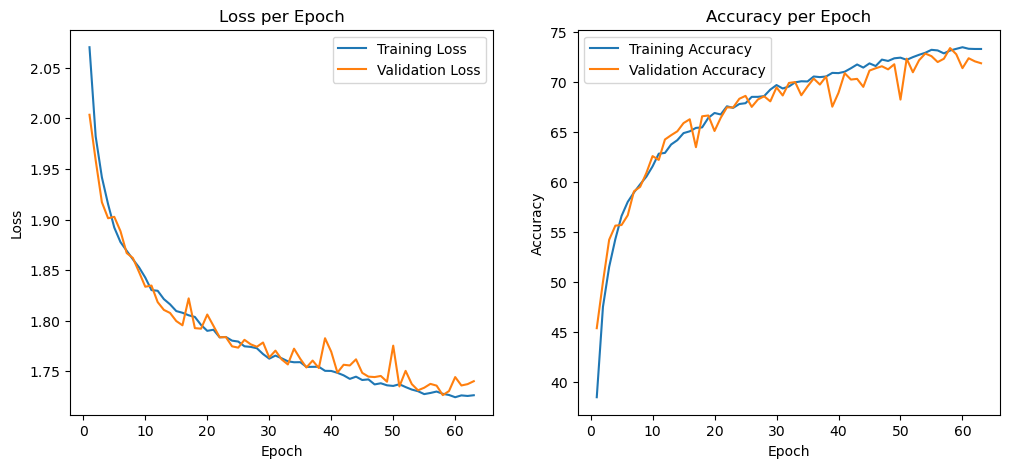

In [518]:
epochs = range(1, len(train_loss_d) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_d, label='Training Loss')
plt.plot(epochs, val_loss_d, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_d, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_d, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> Compare models </h2>

Comparing with model in c and d, we can find that the training loss in model c slightly fluctuates, especially when epoch is less than 10. While in model d, the training loss line becomes smoother. Also, the training accuracy in model c fluctates, while in model d, the training accuracy increases steadily and has faster convergence.

Additionally, model d reaches lower validation loss and higher validation accuracy faster and more steadily than model c, while model c fluctuates more.

We can also see larger gap between training loss and validation loss (or training accuracy and validation accuracy) in model c than the gap in model d. Also in model c, for the last few epochs, we can see slightly increase in loss and decreases in accuracy which means the model c may overfit

Thus, the model d is bettern than model c, especially at training stability and convergence speed aspects.

<h1> e. Optimization </h1>

<h2> Experiment 1: change learning rate </h2>

<h2> 1. learning rate = 0.1 </h2>

In [42]:
torch.manual_seed(901)
np.random.seed(901)

<h3> model from d </h3>

In [44]:
class Batchnorm_Deep_Convo_Neural_Model(nn.Module):
    def __init__(self):
        super(Batchnorm_Deep_Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()
        
        # connected "dense" layer1
        self.connect1 = nn.Linear(64 * 2 * 2, 512)
        # add batch normalization layer
        self.batch_connect1 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        #print(x.size())
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        #print(x.size())
        x = self.pool3(self.relu3(self.batch_norm3(self.conv3(x))))
        #print(x.size())
        x = self.pool4(self.relu4(self.batch_norm4(self.conv4(x))))
        #print(x.size())
        x = self.flatten(x)
        #print(x.size())
        x = self.relu5(self.batch_connect1(self.connect1(x)))
        #print(x.size())
        x = self.connect2(x)
        #print(x.size())
        x = self.softmax(x)
        return x


<h3> set parameters </h3>

In [46]:
early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_e_1 = float('inf')
epochs_no_improve_e_1 = 0


model_e_1 = Batchnorm_Deep_Convo_Neural_Model()

optimizer_e_1 = optim.Adam(model_e_1.parameters(), lr = 0.1)
#optimizer_e_2 = optim.Adam(model_e.parameters(), lr = 0.01)
#optimizer_e_3 = optim.Adam(model_e.parameters(), lr = 0.001)
#optimizer_e_4 = optim.Adam(model_e.parameters(), lr = 0.0001)


train_loss_e_1 = []
train_accuracy_e_1 = []
val_loss_e_1 = []
val_accuracy_e_1 = []


<h3> train loss/accuracy and validation loss/accuracy </h3>

In [48]:
for e in range(epoch_times):
    model_e_1.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader_b_ii:
        optimizer_e_1.zero_grad()
        outputs = model_e_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_e_1.step()
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
    # calculate train loss and accuracy
    train_loss_e_1.append(train_loss / len(trainloader_b_ii))
    train_accuracy_e_1.append(100 * correct_train / total_train)
    # validation
    model_e_1.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_e_1(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_e_1.append(val_loss / len(valloader_b_ii))
    val_accuracy_e_1.append(100 * correct_val / total_val)
    # early stop
    if val_loss < best_val_loss_e_1:
        best_val_loss_e_1 = val_loss
        epochs_no_improve_e_1 = 0
        best_model = model_e_1.state_dict()
    else:
        epochs_no_improve_e_1 = epochs_no_improve_e_1 + 1
        if epochs_no_improve_e_1 >= early_stop_tolerance:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.3458, train accuracy: 11.50%, val Loss: 2.3531, val accuracy: 10.80%
epoch 2/100, train loss: 2.3625, train accuracy: 9.86%, val Loss: 2.3656, val accuracy: 9.54%
epoch 3/100, train loss: 2.3600, train accuracy: 10.12%, val Loss: 2.3656, val accuracy: 9.54%
epoch 4/100, train loss: 2.3600, train accuracy: 10.12%, val Loss: 2.3656, val accuracy: 9.54%
epoch 5/100, train loss: 2.3600, train accuracy: 10.12%, val Loss: 2.3656, val accuracy: 9.54%
early stop


In [49]:
# load best model
model_e_1.load_state_dict(best_model)

<All keys matched successfully>

<h3> test accuracy </h3>

In [50]:
# test
model_e_1.eval()
total_test_e_1 = 0
correct_test_e_1 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_e_1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_e_1 = total_test_e_1 + labels.size(0)
        correct_test_e_1 = correct_test_e_1 + (predicted == labels).sum().item()

test_accuracy_e_1 = 100 * correct_test_e_1 / total_test_e_1
print(f"test accuracy: {test_accuracy_e_1:.2f}%")

test accuracy: 10.00%


<h3> plots </h3>

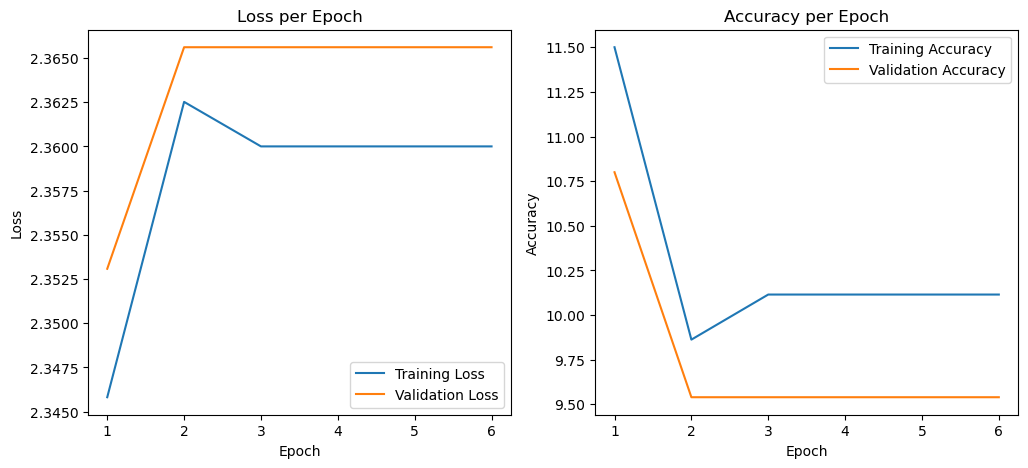

In [51]:
epochs = range(1, len(train_loss_e_1) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_e_1, label='Training Loss')
plt.plot(epochs, val_loss_e_1, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_e_1, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_e_1, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> 2. learning rate = 0.01 </h2>

In [57]:
torch.manual_seed(901)
np.random.seed(901)

<h3> set parameters</h3>

In [59]:
early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_e_2 = float('inf')
epochs_no_improve_e_2 = 0


model_e_2 = Batchnorm_Deep_Convo_Neural_Model()

optimizer_e_2 = optim.Adam(model_e_2.parameters(), lr = 0.01)

train_loss_e_2 = []
train_accuracy_e_2 = []
val_loss_e_2 = []
val_accuracy_e_2 = []

<h3> train loss/accuracy and validation loss/accuracy </h3>

In [61]:
for e in range(epoch_times):
    model_e_2.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader_b_ii:
        optimizer_e_2.zero_grad()
        outputs = model_e_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_e_2.step()
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
    # calculate train loss and accuracy
    train_loss_e_2.append(train_loss / len(trainloader_b_ii))
    train_accuracy_e_2.append(100 * correct_train / total_train)
    # validation
    model_e_2.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_e_2(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_e_2.append(val_loss / len(valloader_b_ii))
    val_accuracy_e_2.append(100 * correct_val / total_val)
    # early stop
    if val_loss < best_val_loss_e_2:
        best_val_loss_e_2 = val_loss
        epochs_no_improve_e_2 = 0
        best_model = model_e_2.state_dict()
    else:
        epochs_no_improve_e_2 = epochs_no_improve_e_2 + 1
        if epochs_no_improve_e_2 >= early_stop_tolerance:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.2088, train accuracy: 24.68%, val Loss: 2.1909, val accuracy: 26.63%
epoch 2/100, train loss: 2.1673, train accuracy: 29.04%, val Loss: 2.1433, val accuracy: 31.45%
epoch 3/100, train loss: 2.1328, train accuracy: 32.45%, val Loss: 2.1398, val accuracy: 31.77%
epoch 4/100, train loss: 2.1108, train accuracy: 34.50%, val Loss: 2.0775, val accuracy: 37.64%
epoch 5/100, train loss: 2.0819, train accuracy: 37.40%, val Loss: 2.0910, val accuracy: 36.63%
epoch 6/100, train loss: 2.0553, train accuracy: 40.09%, val Loss: 2.0416, val accuracy: 41.57%
epoch 7/100, train loss: 2.0492, train accuracy: 40.80%, val Loss: 2.0299, val accuracy: 42.67%
epoch 8/100, train loss: 2.0405, train accuracy: 41.67%, val Loss: 2.0281, val accuracy: 43.04%
epoch 9/100, train loss: 2.0260, train accuracy: 43.13%, val Loss: 2.0426, val accuracy: 41.47%
epoch 10/100, train loss: 2.0103, train accuracy: 44.81%, val Loss: 2.0034, val accuracy: 45.31%
epoch 11/100, train loss: 2.0134, train

In [62]:
# load best model
model_e_2.load_state_dict(best_model)

<All keys matched successfully>

<h3> test accuracy </h3>

In [63]:
# test
model_e_2.eval()
total_test_e_2 = 0
correct_test_e_2 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_e_2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_e_2 = total_test_e_2 + labels.size(0)
        correct_test_e_2 = correct_test_e_2 + (predicted == labels).sum().item()

test_accuracy_e_2 = 100 * correct_test_e_2 / total_test_e_2
print(f"test accuracy: {test_accuracy_e_2:.2f}%")

test accuracy: 57.67%


<h3> plots </h3>

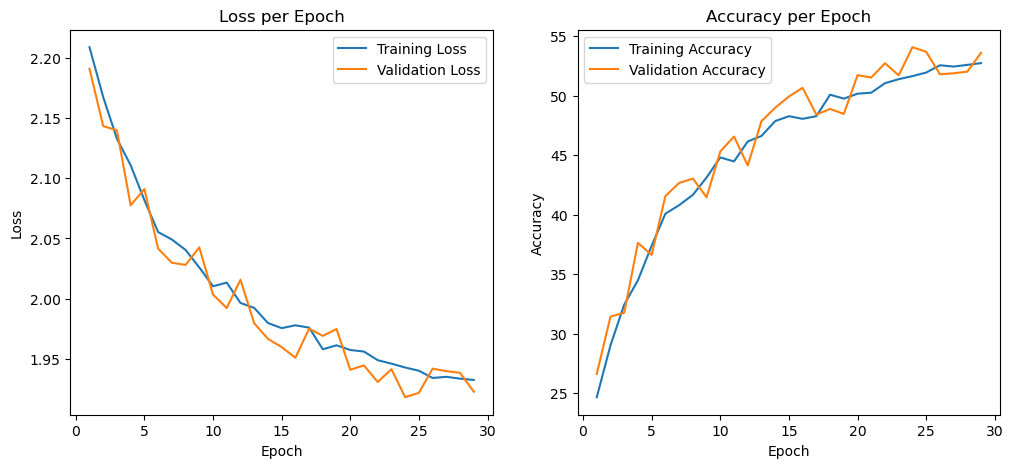

In [64]:
epochs = range(1, len(train_loss_e_2) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_e_2, label='Training Loss')
plt.plot(epochs, val_loss_e_2, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_e_2, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_e_2, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> 3. learning rate = 0.001 </h2>

In [70]:
torch.manual_seed(901)
np.random.seed(901)

<h3> set parameters </h3>

In [72]:
early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_e_3 = float('inf')
epochs_no_improve_e_3 = 0


model_e_3 = Batchnorm_Deep_Convo_Neural_Model()

optimizer_e_3 = optim.Adam(model_e_3.parameters(), lr = 0.001)

train_loss_e_3 = []
train_accuracy_e_3 = []
val_loss_e_3 = []
val_accuracy_e_3 = []

<h3> train loss/accuracy and validation loss/accuracy </h3>

In [74]:
for e in range(epoch_times):
    model_e_3.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader_b_ii:
        optimizer_e_3.zero_grad()
        outputs = model_e_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_e_3.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_e_3.append(train_loss / len(trainloader_b_ii))
    train_accuracy_e_3.append(100 * correct_train / total_train)
    
    # validation
    model_e_3.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_e_3(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_e_3.append(val_loss / len(valloader_b_ii))
    val_accuracy_e_3.append(100 * correct_val / total_val)
    
    # early stop
    if val_loss < best_val_loss_e_3:
        best_val_loss_e_3 = val_loss
        epochs_no_improve_e_3 = 0
        best_model = model_e_3.state_dict()
    else:
        epochs_no_improve_e_3 = epochs_no_improve_e_3 + 1
        if epochs_no_improve_e_3 >= early_stop_tolerance:
            print('early stop')
            break
            
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0695, train accuracy: 38.70%, val Loss: 2.0330, val accuracy: 42.41%
epoch 2/100, train loss: 1.9852, train accuracy: 47.17%, val Loss: 1.9843, val accuracy: 46.86%
epoch 3/100, train loss: 1.9428, train accuracy: 51.59%, val Loss: 1.9333, val accuracy: 52.44%
epoch 4/100, train loss: 1.9138, train accuracy: 54.43%, val Loss: 1.9020, val accuracy: 55.58%
epoch 5/100, train loss: 1.8968, train accuracy: 56.10%, val Loss: 1.8950, val accuracy: 56.07%
epoch 6/100, train loss: 1.8811, train accuracy: 57.72%, val Loss: 1.9028, val accuracy: 55.44%
epoch 7/100, train loss: 1.8694, train accuracy: 58.94%, val Loss: 1.8502, val accuracy: 60.89%
epoch 8/100, train loss: 1.8576, train accuracy: 60.16%, val Loss: 1.8449, val accuracy: 61.21%
epoch 9/100, train loss: 1.8481, train accuracy: 61.05%, val Loss: 1.8426, val accuracy: 61.64%
epoch 10/100, train loss: 1.8377, train accuracy: 62.09%, val Loss: 1.8358, val accuracy: 62.30%
epoch 11/100, train loss: 1.8334, train

In [75]:
# load best model
model_e_3.load_state_dict(best_model)

<All keys matched successfully>

<h3> test accuracy </h3>

In [76]:
# test
model_e_3.eval()
total_test_e_3 = 0
correct_test_e_3 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_e_3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_e_3 = total_test_e_3 + labels.size(0)
        correct_test_e_3 = correct_test_e_3 + (predicted == labels).sum().item()

test_accuracy_e_3 = 100 * correct_test_e_3 / total_test_e_3
print(f"test accuracy: {test_accuracy_e_3:.2f}%")

test accuracy: 77.45%


<h3> plots </h3>

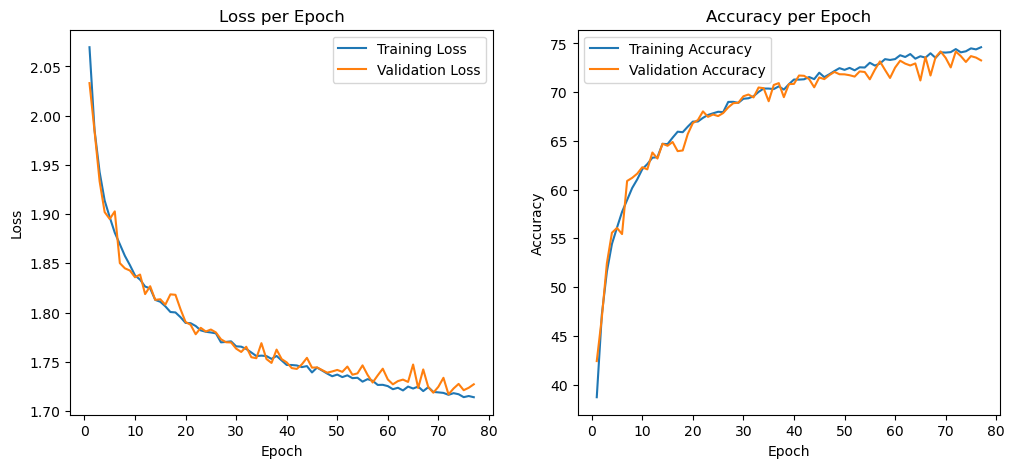

In [77]:
epochs = range(1, len(train_loss_e_3) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_e_3, label='Training Loss')
plt.plot(epochs, val_loss_e_3, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_e_3, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_e_3, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> 4. learning rate = 0.0001 </h2>

In [170]:
torch.manual_seed(901)
np.random.seed(901)

<h3> set parameters </h3>

In [172]:
early_stop_tolerance =5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_e_4 = float('inf')
epochs_no_improve_e_4 = 0


model_e_4 = Batchnorm_Deep_Convo_Neural_Model()

optimizer_e_4 = optim.Adam(model_e_4.parameters(), lr = 0.0001)

train_loss_e_4 = []
train_accuracy_e_4 = []
val_loss_e_4 = []
val_accuracy_e_4 = []

<h3> train loss/accuracy and validation loss/accuracy </h3>

In [174]:
for e in range(epoch_times):
    model_e_4.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader_b_ii:
        optimizer_e_4.zero_grad()
        outputs = model_e_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_e_4.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_e_4.append(train_loss / len(trainloader_b_ii))
    train_accuracy_e_4.append(100 * correct_train / total_train)
    
    # validation
    model_e_4.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_e_4(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_e_4.append(val_loss / len(valloader_b_ii))
    val_accuracy_e_4.append(100 * correct_val / total_val)
    # early stop
    if val_loss < best_val_loss_e_4:
        best_val_loss_e_4 = val_loss
        epochs_no_improve_e_4 = 0
        best_model = model_e_4.state_dict()
    else:
        epochs_no_improve_e_4 = epochs_no_improve_e_4 + 1
        if epochs_no_improve_e_4 >= early_stop_tolerance:
            print('early stop')
            break
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.1481, train accuracy: 32.13%, val Loss: 2.0864, val accuracy: 37.92%
epoch 2/100, train loss: 2.0463, train accuracy: 42.32%, val Loss: 2.0287, val accuracy: 43.68%
epoch 3/100, train loss: 2.0081, train accuracy: 46.12%, val Loss: 1.9924, val accuracy: 47.55%
epoch 4/100, train loss: 1.9779, train accuracy: 49.10%, val Loss: 1.9695, val accuracy: 49.69%
epoch 5/100, train loss: 1.9570, train accuracy: 51.19%, val Loss: 1.9360, val accuracy: 53.33%
epoch 6/100, train loss: 1.9372, train accuracy: 53.09%, val Loss: 1.9212, val accuracy: 54.41%
epoch 7/100, train loss: 1.9228, train accuracy: 54.35%, val Loss: 1.9012, val accuracy: 57.13%
epoch 8/100, train loss: 1.9105, train accuracy: 55.66%, val Loss: 1.8951, val accuracy: 57.20%
epoch 9/100, train loss: 1.8990, train accuracy: 56.76%, val Loss: 1.8871, val accuracy: 57.71%
epoch 10/100, train loss: 1.8874, train accuracy: 57.75%, val Loss: 1.8847, val accuracy: 58.13%
epoch 11/100, train loss: 1.8792, train

In [175]:
# load best model
model_e_4.load_state_dict(best_model)

<All keys matched successfully>

<h3> test accuracy </h3>

In [176]:
# test
model_e_4.eval()
total_test_e_4 = 0
correct_test_e_4 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_e_4(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_e_4 = total_test_e_4 + labels.size(0)
        correct_test_e_4 = correct_test_e_4 + (predicted == labels).sum().item()

test_accuracy_e_4 = 100 * correct_test_e_4 / total_test_e_4
print(f"test accuracy: {test_accuracy_e_4:.2f}%")

test accuracy: 75.62%


<h3> plots </h3>

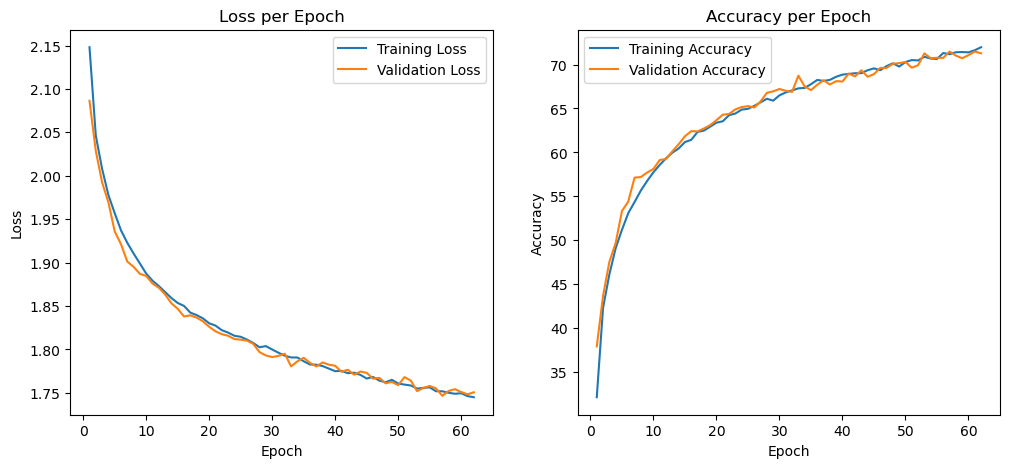

In [177]:
epochs = range(1, len(train_loss_e_4) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_e_4, label='Training Loss')
plt.plot(epochs, val_loss_e_4, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_e_4, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_e_4, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> Experiment 2: SGD </h2>

<h2> 5. SGD optimizer</h2>

Since SGD requires larger batch size, adjust batch size to 128

In [62]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [64]:
torch.manual_seed(901)
np.random.seed(901)

<h3> create trainset validation set and test set</h3>

In [66]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
train_data = torch.tensor(trainset.data / 255.0)
mean = train_data.mean(dim=(0, 1, 2))
std = train_data.std(dim=(0, 1, 2))
print(mean, std)

transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=128, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=128, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465], dtype=torch.float64) tensor([0.2470, 0.2435, 0.2616], dtype=torch.float64)
Files already downloaded and verified
Files already downloaded and verified
40000


<h3> Use model from d </h3>

In [74]:
class Batchnorm_Deep_Convo_Neural_Model(nn.Module):
    def __init__(self):
        super(Batchnorm_Deep_Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()
        
        # connected "dense" layer1
        self.connect1 = nn.Linear(64 * 2 * 2, 512)
        # add batch normalization layer
        self.batch_connect1 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        #print(x.size())
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        #print(x.size())
        x = self.pool3(self.relu3(self.batch_norm3(self.conv3(x))))
        #print(x.size())
        x = self.pool4(self.relu4(self.batch_norm4(self.conv4(x))))
        #print(x.size())
        x = self.flatten(x)
        #print(x.size())
        x = self.relu5(self.batch_connect1(self.connect1(x)))
        #print(x.size())
        x = self.connect2(x)
        #print(x.size())
        x = self.softmax(x)
        return x


<h3> set parameters </h3>

In [76]:
early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_e_5 = float('inf')
epochs_no_improve_e_5 = 0


model_e_5 = Batchnorm_Deep_Convo_Neural_Model()

optimizer_e_5 = optim.SGD(model_e_5.parameters(), lr = 0.01, momentum = 0.9)
scheduler = ReduceLROnPlateau(optimizer_e_5, mode = 'min', patience = 5)

train_loss_e_5 = []
train_accuracy_e_5 = []
val_loss_e_5 = []
val_accuracy_e_5 = []

<h3> train loss/accuracy and validation loss/accuracy </h3>

In [78]:
for e in range(epoch_times):
    model_e_5.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in trainloader_b_ii:
        optimizer_e_5.zero_grad()
        outputs = model_e_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_e_5.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_e_5.append(train_loss / len(trainloader_b_ii))
    train_accuracy_e_5.append(100 * correct_train / total_train)
    
    # validation
    model_e_5.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_e_5(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_e_5.append(val_loss / len(valloader_b_ii))
    val_accuracy_e_5.append(100 * correct_val / total_val)

    # adjust learning rate
    scheduler.step(val_loss / len(valloader_b_ii))
    
    # early stop
    if val_loss < best_val_loss_e_5:
        best_val_loss_e_5 = val_loss
        epochs_no_improve_e_5 = 0
        best_model = model_e_5.state_dict()
    else:
        epochs_no_improve_e_5 = epochs_no_improve_e_5 + 1
        if epochs_no_improve_e_5 >= early_stop_tolerance:
            print('early stop')
            break
    
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.1509, train accuracy: 31.45%, val Loss: 2.1006, val accuracy: 35.62%
epoch 2/100, train loss: 2.0289, train accuracy: 43.97%, val Loss: 2.0397, val accuracy: 41.75%
epoch 3/100, train loss: 1.9832, train accuracy: 48.14%, val Loss: 1.9791, val accuracy: 48.43%
epoch 4/100, train loss: 1.9501, train accuracy: 51.33%, val Loss: 1.9503, val accuracy: 51.33%
epoch 5/100, train loss: 1.9250, train accuracy: 54.10%, val Loss: 1.9369, val accuracy: 52.47%
epoch 6/100, train loss: 1.9027, train accuracy: 56.49%, val Loss: 1.9022, val accuracy: 56.12%
epoch 7/100, train loss: 1.8881, train accuracy: 57.73%, val Loss: 1.8954, val accuracy: 56.73%
epoch 8/100, train loss: 1.8743, train accuracy: 59.08%, val Loss: 1.8827, val accuracy: 57.76%
epoch 9/100, train loss: 1.8592, train accuracy: 60.54%, val Loss: 1.8626, val accuracy: 59.82%
epoch 10/100, train loss: 1.8531, train accuracy: 61.02%, val Loss: 1.8601, val accuracy: 60.13%
epoch 11/100, train loss: 1.8386, train

In [79]:
# load best model
model_e_5.load_state_dict(best_model)

<All keys matched successfully>

<h3> model test accuracy</h3>

In [80]:
# test
model_e_5.eval()
total_test_e_5 = 0
correct_test_e_5 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_e_5(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_e_5 = total_test_e_5 + labels.size(0)
        correct_test_e_5 = correct_test_e_5 + (predicted == labels).sum().item()

test_accuracy_e_5 = 100 * correct_test_e_5 / total_test_e_5
print(f"test accuracy: {test_accuracy_e_5:.2f}%")

test accuracy: 76.81%


<h3> plots </h3>

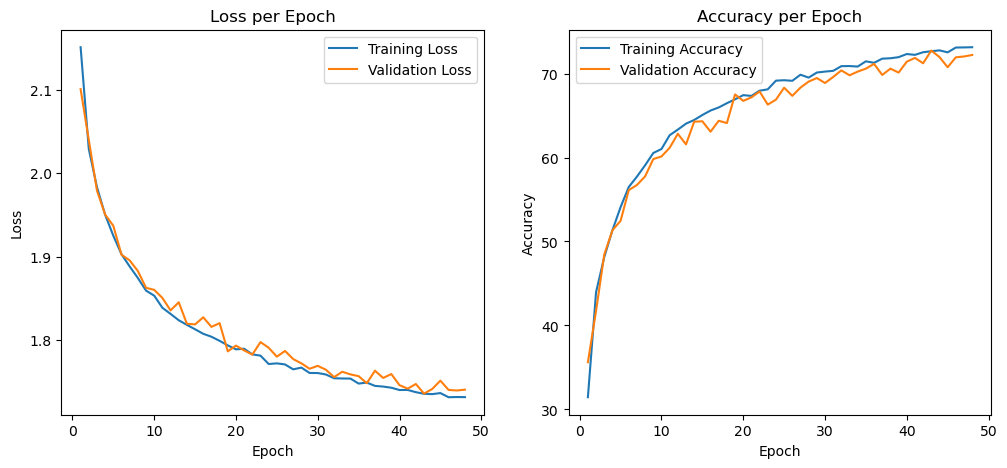

In [81]:
epochs = range(1, len(train_loss_e_5) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_e_5, label='Training Loss')
plt.plot(epochs, val_loss_e_5, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_e_5, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_e_5, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> Compare models </h2>

In [393]:
data_learningrate = {
    'Model': ['Adam0.1', 'Adam0.01', 'Adam0.001','Adam0.0001', 'SGD'],
    'Validation Accuracy': [9.54, 52.02,73.55,71.48,72.04],
    'Training Accuracy': [10.12,52.59,74.39,71.63,73.12],
    'Validation Loss':[2.3656,1.9384,1.7236,1.7484,1.7395],
    'Training Loss': [2.3600,1.9336,1.7152,1.7463,1.7317],
    'Test Accuracy': [10.00, 57.67,77.45,75.62,76.81]
}

df1 = pd.DataFrame(data_learningrate)

df1.set_index('Model', inplace=True)
df1

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Test Accuracy
Model,,,,,
Adam0.1,9.54,10.12,2.3656,2.3600,10.00
Adam0.01,52.02,52.59,1.9384,1.9336,57.67
Adam0.001,73.55,74.39,1.7236,1.7152,77.45
Adam0.0001,71.48,71.63,1.7484,1.7463,75.62
SGD,72.04,73.12,1.7395,1.7317,76.81


In this question, I tyied 2 experiments. The first one used Adam optimizer with learning rate 0.1, 0.01, 0.001 and 0.0001, the second experiment used SGD optimizer.

Among these model test accuracy, the Adam optimizer with learning rate 0.001 has the best validation and test accuracy.

<h1> f. Dropout Regularization </h>

<h2> 1. dropout rate = 0.2 </h2>

In [130]:
torch.manual_seed(901)
np.random.seed(901)

In [132]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
train_data = torch.tensor(trainset.data / 255.0)
mean = train_data.mean(dim=(0, 1, 2))
std = train_data.std(dim=(0, 1, 2))
print(mean, std)

transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=64, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=64, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465], dtype=torch.float64) tensor([0.2470, 0.2435, 0.2616], dtype=torch.float64)
Files already downloaded and verified
Files already downloaded and verified
40000


In [134]:
class Dropout_Batchnorm_Deep_Convo_Neural_Model(nn.Module):
    def __init__(self, dropout_rate):
        super(Dropout_Batchnorm_Deep_Convo_Neural_Model, self).__init__()
        # convolutional layer 1
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)

        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2,2)

        self.flatten = nn.Flatten()

        # connected "dense" layer1
        self.connect1 = nn.Linear(64 * 2 * 2, 512)
        # add batch normalization layer
        self.batch_connect1 = nn.BatchNorm1d(512)
        self.relu5 = nn.ReLU()
        # Dropout layer
        self.dropout1 = nn.Dropout(p = dropout_rate)
        
        # connected "dense" layer2
        self.connect2 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        #print(x.size())
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        #print(x.size())
        x = self.pool3(self.relu3(self.batch_norm3(self.conv3(x))))
        #print(x.size())
        x = self.pool4(self.relu4(self.batch_norm4(self.conv4(x))))
        #print(x.size())
        x = self.flatten(x)
        #print(x.size())
        x = self.relu5(self.batch_connect1(self.connect1(x)))
        x = self.dropout1(x)
        x = self.connect2(x)
        x = self.softmax(x)
        return x

In [136]:
# rate: 0.2, 0.3, 0.4
dropout_rate_f1 = 0.2
model_f1 = Dropout_Batchnorm_Deep_Convo_Neural_Model(dropout_rate_f1)

early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_f1 = float('inf')
epochs_no_improve_f1 = 0

optimizer_f1 = optim.Adam(model_f1.parameters(), lr = 0.001)
#optimizer_f1 = optim.SGD(model_f1.parameters(), lr = 0.001, momentum = 0.9)
#scheduler_f1 = ReduceLROnPlateau(optimizer_f1, mode = 'min', patience = 5, verbose = True)

train_loss_f1 = []
train_accuracy_f1 = []
val_loss_f1 = []
val_accuracy_f1 = []

In [138]:
for e in range(epoch_times):
    model_f1.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in trainloader_b_ii:
        optimizer_f1.zero_grad()
        outputs = model_f1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_f1.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_f1.append(train_loss / len(trainloader_b_ii))
    train_accuracy_f1.append(100 * correct_train / total_train)
    
    # validation
    model_f1.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_f1(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_f1.append(val_loss / len(valloader_b_ii))
    val_accuracy_f1.append(100 * correct_val / total_val)
    
    # early stop
    if val_loss < best_val_loss_f1:
        best_val_loss_f1 = val_loss
        epochs_no_improve_f1 = 0
        best_model = model_f1.state_dict()
    else:
        epochs_no_improve_f1 = epochs_no_improve_f1 + 1
        if epochs_no_improve_f1 >= early_stop_tolerance:
            print('early stop')
            break

    #update_val_loss = val_loss / len(valloader_b_ii)
    #scheduler_f1.step(update_val_loss)
    
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0706, train accuracy: 38.60%, val Loss: 2.0154, val accuracy: 44.06%
epoch 2/100, train loss: 1.9872, train accuracy: 46.99%, val Loss: 1.9760, val accuracy: 47.91%
epoch 3/100, train loss: 1.9440, train accuracy: 51.52%, val Loss: 1.9488, val accuracy: 51.07%
epoch 4/100, train loss: 1.9159, train accuracy: 54.36%, val Loss: 1.9199, val accuracy: 53.59%
epoch 5/100, train loss: 1.9004, train accuracy: 55.70%, val Loss: 1.9023, val accuracy: 55.14%
epoch 6/100, train loss: 1.8843, train accuracy: 57.45%, val Loss: 1.8690, val accuracy: 58.94%
epoch 7/100, train loss: 1.8708, train accuracy: 58.77%, val Loss: 1.8554, val accuracy: 59.99%
epoch 8/100, train loss: 1.8609, train accuracy: 59.74%, val Loss: 1.8603, val accuracy: 59.75%
epoch 9/100, train loss: 1.8573, train accuracy: 60.06%, val Loss: 1.8431, val accuracy: 61.50%
epoch 10/100, train loss: 1.8467, train accuracy: 61.14%, val Loss: 1.8516, val accuracy: 60.46%
epoch 11/100, train loss: 1.8393, train

In [139]:
# load best model
model_f1.load_state_dict(best_model)

<All keys matched successfully>

In [140]:
# test
model_f1.eval()
total_test_f1 = 0
correct_test_f1 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_f1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_f1 = total_test_f1 + labels.size(0)
        correct_test_f1 = correct_test_f1 + (predicted == labels).sum().item()

test_accuracy_f1 = 100 * correct_test_f1 / total_test_f1
print(f"test accuracy: {test_accuracy_f1:.2f}%")

test accuracy: 76.39%


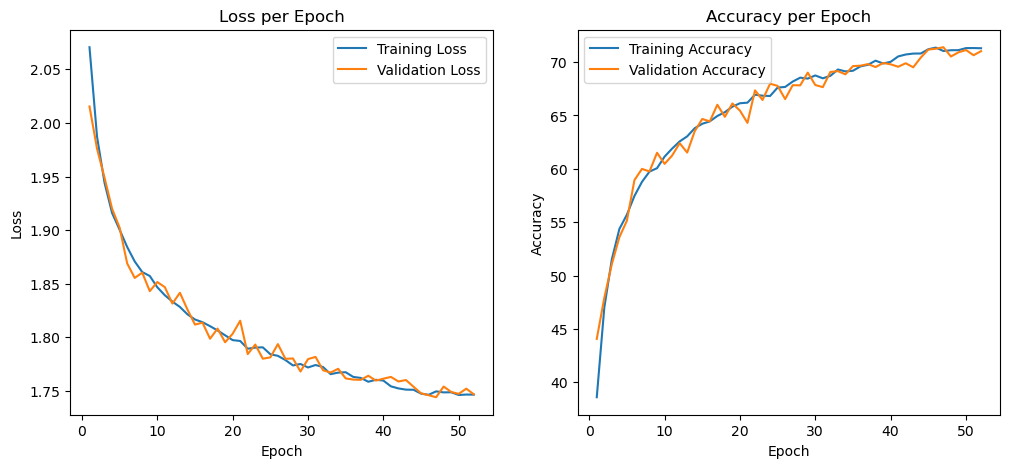

In [141]:
epochs = range(1, len(train_loss_f1) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_f1, label='Training Loss')
plt.plot(epochs, val_loss_f1, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_f1, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_f1, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> 2. dropout rate = 0.3 </h2>

In [146]:
dropout_rate_f2 = 0.3
model_f2 = Dropout_Batchnorm_Deep_Convo_Neural_Model(dropout_rate_f2)

early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_f2 = float('inf')
epochs_no_improve_f2 = 0

optimizer_f2 = optim.Adam(model_f2.parameters(), lr = 0.001)
#optimizer_f2 = optim.SGD(model_f2.parameters(), lr = 0.001, momentum = 0.9)
#scheduler_f2 = ReduceLROnPlateau(optimizer_f2, mode = 'min', patience = 5, verbose = True)

train_loss_f2 = []
train_accuracy_f2 = []
val_loss_f2 = []
val_accuracy_f2 = []

In [148]:
for e in range(epoch_times):
    model_f2.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in trainloader_b_ii:
        optimizer_f2.zero_grad()
        outputs = model_f2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_f2.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_f2.append(train_loss / len(trainloader_b_ii))
    train_accuracy_f2.append(100 * correct_train / total_train)
    
    # validation
    model_f2.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_f2(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_f2.append(val_loss / len(valloader_b_ii))
    val_accuracy_f2.append(100 * correct_val / total_val)
    
    # early stop
    if val_loss < best_val_loss_f2:
        best_val_loss_f2 = val_loss
        epochs_no_improve_f2 = 0
        best_model = model_f2.state_dict()
    else:
        epochs_no_improve_f2 = epochs_no_improve_f2 + 1
        if epochs_no_improve_f2 >= early_stop_tolerance:
            print('early stop')
            break

    #update_val_loss = val_loss / len(valloader_b_ii)
    #scheduler_f2.step(update_val_loss)
    
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0697, train accuracy: 38.78%, val Loss: 2.0072, val accuracy: 44.86%
epoch 2/100, train loss: 1.9764, train accuracy: 48.14%, val Loss: 1.9654, val accuracy: 49.13%
epoch 3/100, train loss: 1.9350, train accuracy: 52.32%, val Loss: 1.9214, val accuracy: 53.77%
epoch 4/100, train loss: 1.9119, train accuracy: 54.63%, val Loss: 1.9170, val accuracy: 53.99%
epoch 5/100, train loss: 1.8924, train accuracy: 56.55%, val Loss: 1.8770, val accuracy: 57.98%
epoch 6/100, train loss: 1.8795, train accuracy: 57.85%, val Loss: 1.8705, val accuracy: 58.70%
epoch 7/100, train loss: 1.8674, train accuracy: 59.08%, val Loss: 1.8568, val accuracy: 60.01%
epoch 8/100, train loss: 1.8599, train accuracy: 59.86%, val Loss: 1.8639, val accuracy: 59.33%
epoch 9/100, train loss: 1.8483, train accuracy: 61.11%, val Loss: 1.8421, val accuracy: 61.50%
epoch 10/100, train loss: 1.8508, train accuracy: 60.76%, val Loss: 1.8366, val accuracy: 62.19%
epoch 11/100, train loss: 1.8402, train

In [149]:
# load best model
model_f2.load_state_dict(best_model)

<All keys matched successfully>

In [150]:
# test
model_f2.eval()
total_test_f2 = 0
correct_test_f2 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_f2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_f2 = total_test_f2 + labels.size(0)
        correct_test_f2 = correct_test_f2 + (predicted == labels).sum().item()

test_accuracy_f2 = 100 * correct_test_f2 / total_test_f2
print(f"test accuracy: {test_accuracy_f2:.2f}%")

test accuracy: 74.43%


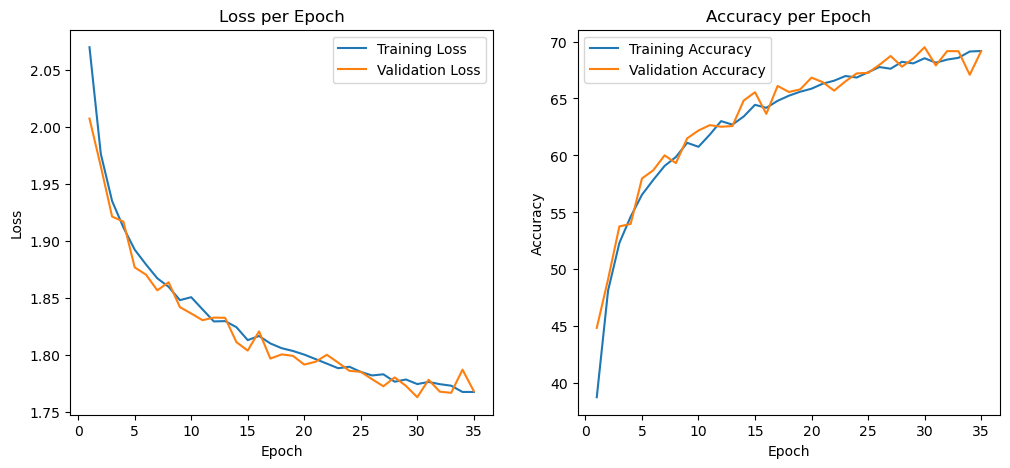

In [151]:
epochs = range(1, len(train_loss_f2) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_f2, label='Training Loss')
plt.plot(epochs, val_loss_f2, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_f2, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_f2, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h2> 3. dropout rate = 0.4 </h2>

In [164]:
dropout_rate_f3 = 0.4
model_f3 = Dropout_Batchnorm_Deep_Convo_Neural_Model(dropout_rate_f2)

early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_f3 = float('inf')
epochs_no_improve_f3 = 0

optimizer_f3 = optim.Adam(model_f3.parameters(), lr = 0.001)
#optimizer_f3 = optim.SGD(model_f3.parameters(), lr = 0.001, momentum = 0.9)
#scheduler_f3 = ReduceLROnPlateau(optimizer_f3, mode = 'min', patience = 5, verbose = True)

train_loss_f3 = []
train_accuracy_f3 = []
val_loss_f3 = []
val_accuracy_f3 = []

In [166]:
for e in range(epoch_times):
    model_f3.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in trainloader_b_ii:
        optimizer_f3.zero_grad()
        outputs = model_f3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_f3.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_f3.append(train_loss / len(trainloader_b_ii))
    train_accuracy_f3.append(100 * correct_train / total_train)
    
    # validation
    model_f3.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_f3(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_f3.append(val_loss / len(valloader_b_ii))
    val_accuracy_f3.append(100 * correct_val / total_val)
    
    # early stop
    if val_loss < best_val_loss_f3:
        best_val_loss_f3 = val_loss
        epochs_no_improve_f3 = 0
        best_model = model_f3.state_dict()
    else:
        epochs_no_improve_f3 = epochs_no_improve_f3 + 1
        if epochs_no_improve_f3 >= early_stop_tolerance:
            print('early stop')
            break

    #update_val_loss = val_loss / len(valloader_b_ii)
    #scheduler_f3.step(update_val_loss)
    
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0799, train accuracy: 37.76%, val Loss: 2.0396, val accuracy: 41.34%
epoch 2/100, train loss: 1.9925, train accuracy: 46.55%, val Loss: 1.9489, val accuracy: 50.98%
epoch 3/100, train loss: 1.9487, train accuracy: 50.97%, val Loss: 1.9378, val accuracy: 51.87%
epoch 4/100, train loss: 1.9178, train accuracy: 54.09%, val Loss: 1.9006, val accuracy: 55.95%
epoch 5/100, train loss: 1.8966, train accuracy: 56.16%, val Loss: 1.8940, val accuracy: 56.26%
epoch 6/100, train loss: 1.8820, train accuracy: 57.72%, val Loss: 1.8609, val accuracy: 59.90%
epoch 7/100, train loss: 1.8679, train accuracy: 59.11%, val Loss: 1.8608, val accuracy: 59.69%
epoch 8/100, train loss: 1.8572, train accuracy: 60.06%, val Loss: 1.8490, val accuracy: 60.86%
epoch 9/100, train loss: 1.8475, train accuracy: 61.15%, val Loss: 1.8466, val accuracy: 61.13%
epoch 10/100, train loss: 1.8450, train accuracy: 61.36%, val Loss: 1.8384, val accuracy: 62.05%
epoch 11/100, train loss: 1.8374, train

In [167]:
# load best model
model_f3.load_state_dict(best_model)

<All keys matched successfully>

In [168]:
# test
model_f3.eval()
total_test_f3 = 0
correct_test_f3 = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_f3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_f3 = total_test_f3 + labels.size(0)
        correct_test_f3 = correct_test_f3 + (predicted == labels).sum().item()

test_accuracy_f3 = 100 * correct_test_f3 / total_test_f3
print(f"test accuracy: {test_accuracy_f3:.2f}%")

test accuracy: 75.15%


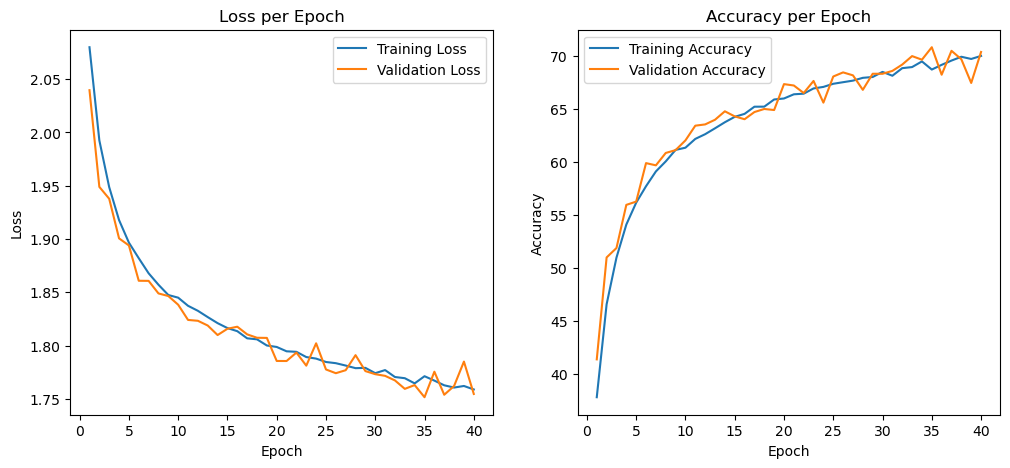

In [169]:
epochs = range(1, len(train_loss_f3) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_f3, label='Training Loss')
plt.plot(epochs, val_loss_f3, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_f3, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_f3, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<h3> Result Table </h3>

In [190]:
data_dropout = {
    'Model': ['dropout=0.2', 'dropout=0.3', 'dropout=0.4'],
    'Validation Accuracy': [val_accuracy_f1[-1],val_accuracy_f2[-1],val_accuracy_f3[-1]],
    'Train Accuracy': [train_accuracy_f1[-1], train_accuracy_f2[-1], train_accuracy_f3[-1]],
    'Test Accuracy': [test_accuracy_f1, test_accuracy_f2, test_accuracy_f3]
}

df2 = pd.DataFrame(data_dropout)

df2.set_index('Model', inplace=True)
df2

,Validation Accuracy,Train Accuracy,Test Accuracy
Model,,,
dropout=0.2,71.02,71.2950,76.39
dropout=0.3,69.14,69.1700,74.43
dropout=0.4,70.41,70.0375,75.15


From the above table, even though dropout rate = 0.2 has slightly higher validation accuracy, I would like to choose dropout rate as 0.2 since it has the best test accuracy.

If compare the three models in this questions with previous models, we can see before adding dropout, the gap between training accuracy and validation accuracy will become larger, which shows slightly overfitting. After adding dropout, it prevents some overfitting.

<h1> g. Further Improvements </h1>

I this question, I increased the depth of the network by incorporating additional convolutional and pooling layers, I also grouped several successive convolutional layers at a time before passing them through a pooling layer, incorporated more advanced data augmentation strategies like mixing and combining data points, and adjust hyperparameters such as dropout rate = 0.3, learning rate = 0.0005 and batch size = 128.

The model has the best test accuracy among all models, the test accuracy is 78.61%, and plot shows below.

In [367]:
# mixing
def mixing(inputs, labels, alpha):
    if alpha > 0:
        p = torch.distributions.Beta(alpha, alpha).sample().item()
    else:
        p = 1.0
    batch_size = inputs.size(0)
    index = torch.randperm(batch_size)
    mixing_x = p * inputs + (1 - p) * inputs[index]
    mixing_y = p * labels + (1 - p) * labels[index]
    return mixing_x, mixing_y

# cutmix
def cutmix(x, y, alpha):
    if alpha > 0:
        p = torch.distributions.Beta(alpha, alpha).sample().item()
    else:
        p = 1.0
    batch_size, _, H, W = x.shape
    index = torch.randperm(batch_size)
    cut_x, cut_y = np.random.randint(W), np.random.randint(H)
    width, height = int(W * np.sqrt(1 - p)), int(H * np.sqrt(1 - p))
    x1, x2 = max(cut_x - width // 2, 0), min(cut_x + width // 2, W)
    y1, y2 = max(cut_y - height // 2, 0), min(cut_y + height // 2, H)
    mixed_x = x.clone()
    mixed_x[:, :, y1:y2, x1:x2] = x[index, :, y1:y2, x1:x2]
    p = 1 - ((x2 - x1) * (y2 - y1) / (W * H))
    mixed_y = p * y + (1 - p) * y[index]
    return mixed_x, mixed_y

# combination above 2, each 50% being used
def advanced_mixing(x, y, alpha, prob):
    if torch.rand(1).item() < prob:
        return mixing(x, y, alpha)
    else:
        return cutmix(x, y, alpha)


In [369]:
transform_train_b_ii = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding = 4),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2, hue = 0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

transform_test_b_ii = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

trainset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform_train_b_ii)
testset_b_ii = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test_b_ii)

training_set_size = int(len(trainset_b_ii) * 0.8)
validation_set_size = int(len(trainset_b_ii) * 0.2)
print(training_set_size)
training_set_b_ii, validation_set_b_ii = random_split(trainset_b_ii, [training_set_size, validation_set_size])

trainloader_b_ii = torch.utils.data.DataLoader(training_set_b_ii, batch_size=128, shuffle=True, num_workers=2)
valloader_b_ii = torch.utils.data.DataLoader(validation_set_b_ii, batch_size=128, shuffle=False, num_workers=2)
testloader_b_ii = torch.utils.data.DataLoader(testset_b_ii, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified
40000


In [371]:
# different kernel sizes for convolutional layer1
# increase depth layer5 and 6 and pool layer
# group conv layers such as group 3 and 4, group 5 and 6

In [373]:
class Further_Improvements(nn.Module):
    def __init__(self, dropout_rate):
        super(Further_Improvements, self).__init__()
        # first group
        # convolutional layer 1
        # change kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1)
        # add batch normalization layer
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2,2)
        
        # convolutional layer 2
        # change kernel
        self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)
        
        # second group
        # additional convolutional layer 3
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        #self.pool3 = nn.MaxPool2d(2,2)

        # additional convolutional layer 4
        self.conv4 = nn.Conv2d(64, 64, 3, padding = 1)
        # add batch normalization layer
        self.batch_norm4 = nn.BatchNorm2d(64)
        self.relu4 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(2,2)

        ############# increase depth ###########
        # third group
        # additional convolutional layer 5
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.batch_norm5 = nn.BatchNorm2d(128)
        self.relu5 = nn.ReLU()

        # additional convolutional layer 6
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.batch_norm6 = nn.BatchNorm2d(128)
        self.relu6 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(2, 2)

        self.flatten = nn.Flatten()

        # connected "dense" layer1
        self.connect1 = nn.Linear(128 * 2 * 2, 1024)
        # add batch normalization layer
        self.batch_connect1 = nn.BatchNorm1d(1024)
        self.relu7 = nn.ReLU()
        # Dropout layer
        self.dropout1 = nn.Dropout(p = dropout_rate)

        ########### add connected layer ###########
        # connected "dense" layer2
        self.connect2 = nn.Linear(1024, 512)
        self.batch_connect2 = nn.BatchNorm1d(512)
        self.relu8 = nn.ReLU()
        # Dropout layer
        self.dropout2 = nn.Dropout(p = dropout_rate)
        
        # connected "dense" layer3
        self.connect3 = nn.Linear(512, 10)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        #print(x.shape)
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        #print(x.shape)
        x = self.relu3(self.batch_norm3(self.conv3(x)))
        #print(x.shape)
        x = self.relu4(self.batch_norm4(self.conv4(x)))
        #print(x.shape)
        x = self.pool3(x)
        #print(x.shape)
        x = self.relu5(self.batch_norm5(self.conv5(x)))
        #print(x.shape)
        x = self.relu6(self.batch_norm6(self.conv6(x)))
        #print(x.shape)
        x = self.pool4(x)
        #print(x.shape)
        x = self.flatten(x)
        #print(x.shape)
        x = self.relu7(self.batch_connect1(self.connect1(x)))
        #print(x.shape)
        x = self.dropout1(x)
        #print(x.shape)
        x = self.relu8(self.batch_connect2(self.connect2(x)))
        #print(x.shape)
        x = self.dropout2(x)
        #print(x.shape)
        x = self.connect3(x)
        #print(x.shape)
        x = self.softmax(x)
        return x

In [375]:
# dropout rate (see f)
# optimizer (see e)
##### change
dropout_rate_g = 0.3

model_g = Further_Improvements(dropout_rate_g)

early_stop_tolerance = 5
criterion = nn.CrossEntropyLoss()
epoch_times = 100

best_val_loss_g = float('inf')
epochs_no_improve_g = 0
##### change
optimizer_g = optim.Adam(model_g.parameters(), lr = 0.0005)
#optimizer_g = optim.Adam(model_g.parameters(), lr = 0.001)
#optimizer_g = optim.SGD(model_g.parameters(), lr = 0.001, momentum = 0.9)
#scheduler_g = ReduceLROnPlateau(optimizer_g, mode = 'min', patience = 5, verbose = True)

train_loss_g = []
train_accuracy_g = []
val_loss_g = []
val_accuracy_g = []

In [377]:
for e in range(epoch_times):
    model_g.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader_b_ii:
        advanced_mixing(inputs, labels, alpha=0.4, prob=0.5)
        optimizer_g.zero_grad()
        outputs = model_g(inputs)
        # change above criterion
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_g.step()
        
        # record loss and accuracy
        train_loss = train_loss + loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train = total_train + labels.size(0)
        correct_train = correct_train + (predicted == labels).sum().item()
        
    # calculate train loss and accuracy
    train_loss_g.append(train_loss / len(trainloader_b_ii))
    train_accuracy_g.append(100 * correct_train / total_train)
    
    # validation
    model_g.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in valloader_b_ii:
            outputs = model_g(inputs)
            loss = criterion(outputs, labels)
            val_loss = val_loss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val = total_val + labels.size(0)
            correct_val = correct_val + (predicted == labels).sum().item()

    # calculate validation set loss and accuracy
    val_loss_g.append(val_loss / len(valloader_b_ii))
    val_accuracy_g.append(100 * correct_val / total_val)
    
    # early stop
    if val_loss < best_val_loss_g:
        best_val_loss_g = val_loss
        epochs_no_improve_g = 0
        best_model = model_g.state_dict()
    else:
        epochs_no_improve_g = epochs_no_improve_g + 1
        if epochs_no_improve_g >= early_stop_tolerance:
            print('early stop')
            break
            
    print(f"epoch {e + 1}/{epoch_times}, train loss: {train_loss/len(trainloader_b_ii):.4f}, train accuracy: {100 * correct_train / total_train:.2f}%, "
          f"val Loss: {val_loss/len(valloader_b_ii):.4f}, val accuracy: {100 * correct_val / total_val:.2f}%")

epoch 1/100, train loss: 2.0921, train accuracy: 36.42%, val Loss: 2.0486, val accuracy: 40.74%
epoch 2/100, train loss: 1.9942, train accuracy: 46.34%, val Loss: 1.9535, val accuracy: 50.48%
epoch 3/100, train loss: 1.9510, train accuracy: 50.85%, val Loss: 1.9352, val accuracy: 51.96%
epoch 4/100, train loss: 1.9212, train accuracy: 53.67%, val Loss: 1.9036, val accuracy: 55.20%
epoch 5/100, train loss: 1.8927, train accuracy: 56.66%, val Loss: 1.8993, val accuracy: 55.93%
epoch 6/100, train loss: 1.8739, train accuracy: 58.38%, val Loss: 1.9068, val accuracy: 55.26%
epoch 7/100, train loss: 1.8607, train accuracy: 59.73%, val Loss: 1.8795, val accuracy: 57.91%
epoch 8/100, train loss: 1.8478, train accuracy: 61.11%, val Loss: 1.8477, val accuracy: 60.75%
epoch 9/100, train loss: 1.8323, train accuracy: 62.67%, val Loss: 1.8409, val accuracy: 61.69%
epoch 10/100, train loss: 1.8267, train accuracy: 63.27%, val Loss: 1.8419, val accuracy: 61.28%
epoch 11/100, train loss: 1.8194, train

In [378]:
# load best model
model_g.load_state_dict(best_model)

<All keys matched successfully>

<h3> final model test accuracy </h3>

In [379]:
# test
model_g.eval()
total_test_g = 0
correct_test_g = 0

with torch.no_grad():
    for inputs, labels in testloader_b_ii:
        outputs = model_g(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test_g = total_test_g + labels.size(0)
        correct_test_g = correct_test_g + (predicted == labels).sum().item()

test_accuracy_g = 100 * correct_test_g / total_test_g
print(f"test accuracy: {test_accuracy_g:.2f}%")

test accuracy: 78.61%


<h3> final model plots </h3>

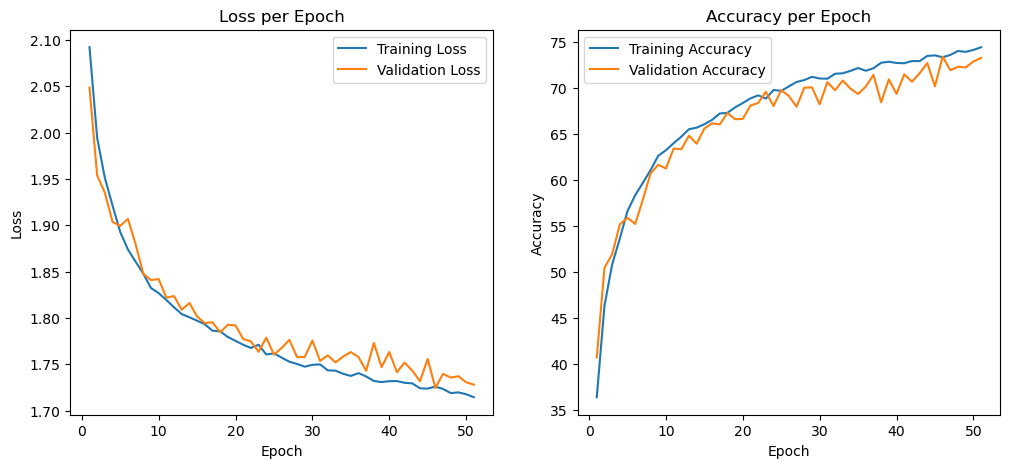

In [380]:
epochs = range(1, len(train_loss_g) + 1)

plt.figure(figsize=(12, 5))

# loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_g, label='Training Loss')
plt.plot(epochs, val_loss_g, label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_g, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy_g, label = 'Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()